In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

deliveries = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
matches = pd.read_csv("IPL Matches 2008-2020.csv")

deliveries_matches = deliveries.merge(matches, how='left', on='id')
rashid_bowling = deliveries_matches[deliveries_matches['bowler'].str.startswith('Rashid Khan')]
rashid_bowling



,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
136612,1082591,2,7,1,TM Head,KM Jadhav,Rashid Khan,4,0,4,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,N,NaN,AY Dandekar,NJ Llong
136613,1082591,2,7,2,TM Head,KM Jadhav,Rashid Khan,2,0,2,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,N,NaN,AY Dandekar,NJ Llong
136614,1082591,2,7,3,TM Head,KM Jadhav,Rashid Khan,1,0,1,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,N,NaN,AY Dandekar,NJ Llong
136615,1082591,2,7,4,KM Jadhav,TM Head,Rashid Khan,1,0,1,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,N,NaN,AY Dandekar,NJ Llong
136616,1082591,2,7,5,TM Head,KM Jadhav,Rashid Khan,1,0,1,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,N,NaN,AY Dandekar,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193077,1237180,1,10,2,S Dhawan,SS Iyer,Rashid Khan,1,0,1,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
193078,1237180,1,10,3,SS Iyer,S Dhawan,Rashid Khan,1,0,1,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
193079,1237180,1,10,4,S Dhawan,SS Iyer,Rashid Khan,0,0,0,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
193080,1237180,1,10,5,S Dhawan,SS Iyer,Rashid Khan,1,0,1,...,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [2]:
rashid_bowling.ball = 1
batsmen_against_rashid = rashid_bowling.groupby(by='batsman').sum()
batsmen_against_rashid

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin
batsman,,,,,,,,,,,
AB de Villiers,44418600,41,372,37,37,2,39,0,2,0,284.0
AD Mathews,2165222,4,28,2,2,0,2,0,0,0,30.0
AD Russell,12861758,18,150,11,10,0,10,0,1,0,91.0
AJ Finch,29589130,26,243,25,37,0,37,0,2,0,228.0
AM Rahane,39331641,55,340,34,41,0,41,0,1,0,444.0
...,...,...,...,...,...,...,...,...,...,...,...
V Kohli,21995116,28,148,19,18,0,18,0,1,0,165.0
V Shankar,3409788,3,48,3,1,0,1,0,0,0,21.0
WP Saha,4330464,8,44,4,1,0,1,0,1,0,62.0


In [4]:
batsmen_against_rashid['Average'] = batsmen_against_rashid['batsman_runs']/batsmen_against_rashid['is_wicket']
batsmen_against_rashid['Strike Rate'] = batsmen_against_rashid['batsman_runs']/batsmen_against_rashid['ball']*100
batsmen_against_rashid = batsmen_against_rashid.round(decimals=2)

In [5]:
batsmen_against_rashid

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Average,Strike Rate
batsman,,,,,,,,,,,,,
AB de Villiers,44418600,41,372,37,37,2,39,0,2,0,284.0,18.5,100.00
AD Mathews,2165222,4,28,2,2,0,2,0,0,0,30.0,inf,100.00
AD Russell,12861758,18,150,11,10,0,10,0,1,0,91.0,10.0,90.91
AJ Finch,29589130,26,243,25,37,0,37,0,2,0,228.0,18.5,148.00
AM Rahane,39331641,55,340,34,41,0,41,0,1,0,444.0,41.0,120.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
V Kohli,21995116,28,148,19,18,0,18,0,1,0,165.0,18.0,94.74
V Shankar,3409788,3,48,3,1,0,1,0,0,0,21.0,inf,33.33
WP Saha,4330464,8,44,4,1,0,1,0,1,0,62.0,1.0,25.00


In [7]:
most_runs_against_rashid = batsmen_against_rashid.sort_values(by='batsman_runs', ascending=False)
most_runs_against_rashid

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Average,Strike Rate
batsman,,,,,,,,,,,,,
SR Watson,54660505,80,498,47,82,1,83,0,0,0,597.0,inf,174.47
SS Iyer,75450953,94,662,65,69,2,71,0,2,0,1399.0,34.50,106.15
RV Uthappa,46088437,70,371,41,64,0,64,0,2,0,664.0,32.00,156.10
RR Pant,66195012,87,587,57,61,2,63,0,3,0,1566.0,20.33,107.02
AT Rayudu,62788130,81,609,54,61,1,62,0,0,0,546.0,inf,112.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DJ Hooda,1216498,1,14,1,0,0,0,0,1,0,12.0,0.00,0.00
NV Ojha,1136596,1,16,1,0,0,0,0,1,0,7.0,0.00,0.00
R Ashwin,2315008,4,29,2,0,0,0,0,2,0,58.0,0.00,0.00


In [55]:
highest_avg_against_rashid = batsmen_against_rashid.sort_values(by=['Average', 'batsman_runs'], ascending=False)
highest_avg_against_rashid

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Average,Strike Rate
batsman,,,,,,,,,,,,,
SR Watson,54660505,80,498,47,82,1,83,0,0,0,597.0,inf,174.47
AT Rayudu,62788130,81,609,54,61,1,62,0,0,0,546.0,inf,112.96
M Vohra,18512333,34,165,17,39,4,43,0,0,0,85.0,inf,229.41
RA Tripathi,12124561,18,98,11,18,0,18,0,0,0,78.0,inf,163.64
SA Yadav,23374666,27,194,20,16,0,16,0,0,0,291.0,inf,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
K Rabada,1216524,2,12,1,0,0,0,0,0,0,88.0,NaN,0.00
Mohammed Siraj,2350732,4,34,2,0,0,0,0,0,0,236.0,NaN,0.00
PJ Sangwan,4546268,4,68,4,0,1,1,0,0,0,4.0,NaN,0.00


In [48]:
highest_sr_against_rashid = batsmen_against_rashid.sort_values(by='Strike Rate', ascending=False)
highest_sr_against_rashid

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Average,Strike Rate
batsman,,,,,,,,,,,,,
KC Cariappa,3535239,3,57,3,9,0,9,0,0,0,27.0,inf,300.00
R Tewatia,6082535,10,85,5,12,1,13,0,0,0,25.0,inf,240.00
M Vohra,18512333,34,165,17,39,4,43,0,0,0,85.0,inf,229.41
Mujeeb Ur Rahman,4706254,8,58,4,9,0,9,0,0,0,164.0,inf,225.00
RD Chahar,3535182,3,48,3,6,0,6,0,0,0,120.0,inf,200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE Rutherford,2363532,4,28,2,0,0,0,0,0,0,4.0,NaN,0.00
SS Tiwary,1216495,1,12,1,0,0,0,0,1,0,10.0,0.0,0.00
Harbhajan Singh,4546468,8,60,4,0,0,0,0,0,0,8.0,NaN,0.00


In [10]:
most_runs_against_rashid.head(20)

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Average,Strike Rate
batsman,,,,,,,,,,,,,
SR Watson,54660505,80,498,47,82,1,83,0,0,0,597.0,inf,174.47
SS Iyer,75450953,94,662,65,69,2,71,0,2,0,1399.0,34.50,106.15
RV Uthappa,46088437,70,371,41,64,0,64,0,2,0,664.0,32.00,156.10
RR Pant,66195012,87,587,57,61,2,63,0,3,0,1566.0,20.33,107.02
AT Rayudu,62788130,81,609,54,61,1,62,0,0,0,546.0,inf,112.96
N Rana,51118625,71,386,44,56,1,57,0,1,0,203.0,56.00,127.27
CH Gayle,30152269,29,225,26,51,0,51,0,1,0,356.0,51.00,196.15
Ishan Kishan,41318350,35,325,35,47,5,52,0,1,0,685.0,47.00,134.29
SK Raina,40042339,49,343,35,46,5,51,0,3,0,221.0,15.33,131.43


In [19]:
most_runs_against_rashid['Average'][0] = 82
most_runs_against_rashid['Average'][4] = 61

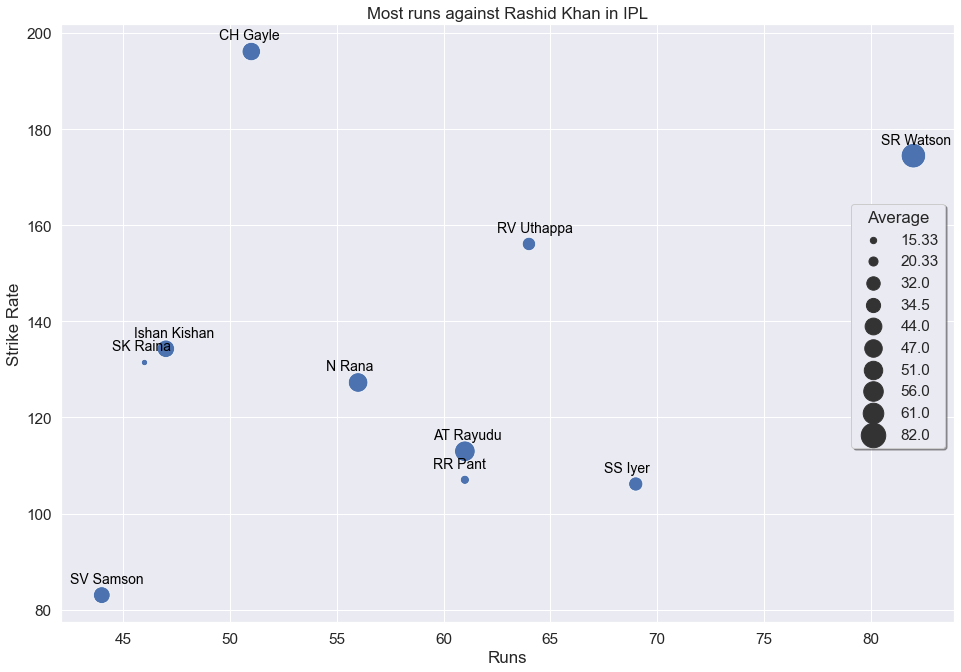

In [127]:
plt.figure(figsize=(16,11))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
sns.scatterplot(x='batsman_runs', y='Strike Rate', data=most_runs_against_rashid.head(10), size='Average', sizes=(40, 600), legend='full')
plt.title("Most runs against Rashid Khan in IPL")
plt.xlabel("Runs")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,most_runs_against_rashid.head(10).shape[0]):
     plt.text(most_runs_against_rashid['batsman_runs'][line]-1.5, most_runs_against_rashid['Strike Rate'][line]+2.5, most_runs_against_rashid.index[line], horizontalalignment='left', size='small', color='black', )

# plt.text(MS_RP_bowler_type['Average'][6]-6.5, MS_RP_bowler_type['Strike Rate'][6]+5.5, MS_RP_bowler_type['Bowler Category'][6], horizontalalignment='left', size='small', color='black', )
plt.legend(bbox_to_anchor=(0.99, 0.7), loc=1, borderaxespad=0., title='Average', shadow=True)


In [71]:
highest_avg_against_rashid.head(60)
highest_avg_against_rashid.drop([39], inplace=True)
highest_avg_against_rashid.head(50)

,batsman,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Average,Strike Rate
0,SR Watson,54660505,80,498,47,82,1,83,0,0,0,597.0,inf,174.47
1,AT Rayudu,62788130,81,609,54,61,1,62,0,0,0,546.0,inf,112.96
2,M Vohra,18512333,34,165,17,39,4,43,0,0,0,85.0,inf,229.41
3,RA Tripathi,12124561,18,98,11,18,0,18,0,0,0,78.0,inf,163.64
4,SA Yadav,23374666,27,194,20,16,0,16,0,0,0,291.0,inf,80.00
40,N Rana,51118625,71,386,44,56,1,57,0,1,0,203.0,56.00,127.27
41,CH Gayle,30152269,29,225,26,51,0,51,0,1,0,356.0,51.00,196.15
42,Ishan Kishan,41318350,35,325,35,47,5,52,0,1,0,685.0,47.00,134.29
43,SV Samson,61685272,85,476,53,44,4,48,0,1,0,443.0,44.00,83.02
44,AM Rahane,39331641,55,340,34,41,0,41,0,1,0,444.0,41.00,120.59


In [80]:
highest_avg_against_rashid.head(13)

,batsman,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Average,Strike Rate
0,SR Watson,54660505,80,498,47,82,1,83,0,0,0,597.0,inf,174.47
1,AT Rayudu,62788130,81,609,54,61,1,62,0,0,0,546.0,inf,112.96
2,M Vohra,18512333,34,165,17,39,4,43,0,0,0,85.0,inf,229.41
3,RA Tripathi,12124561,18,98,11,18,0,18,0,0,0,78.0,inf,163.64
4,SA Yadav,23374666,27,194,20,16,0,16,0,0,0,291.0,inf,80.00
5,N Rana,51118625,71,386,44,56,1,57,0,1,0,203.0,56.0,127.27
6,CH Gayle,30152269,29,225,26,51,0,51,0,1,0,356.0,51.0,196.15
7,Ishan Kishan,41318350,35,325,35,47,5,52,0,1,0,685.0,47.0,134.29
8,SV Samson,61685272,85,476,53,44,4,48,0,1,0,443.0,44.0,83.02
9,AM Rahane,39331641,55,340,34,41,0,41,0,1,0,444.0,41.0,120.59


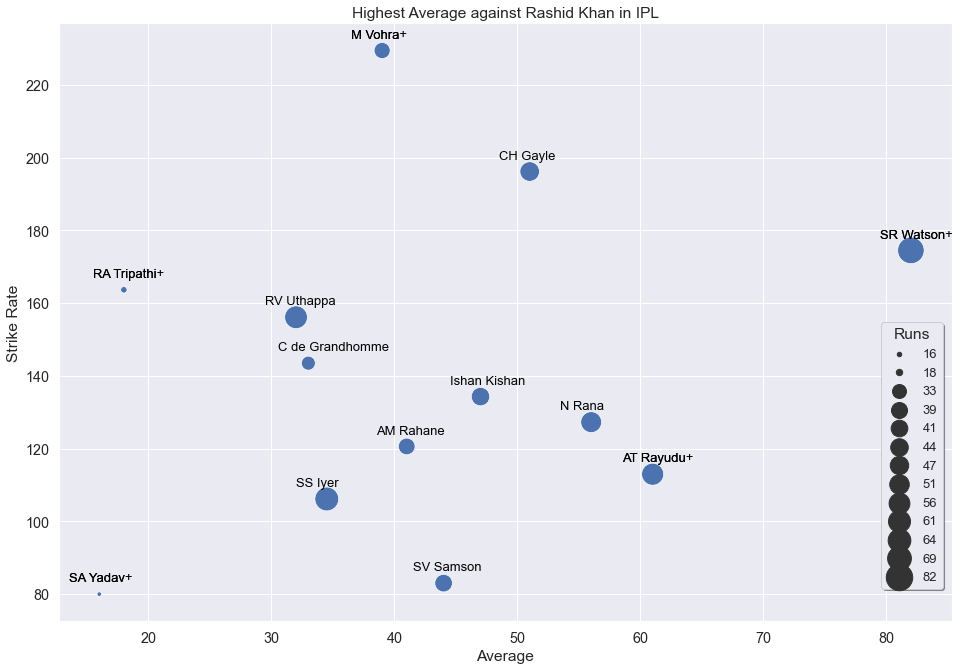

In [122]:
plt.figure(figsize=(16,11))
sns.set(font_scale=1.3)
# sns.set_style('darkgrid')
sns.scatterplot(x='Average', y='Strike Rate', data=highest_avg_against_rashid.head(13), size='batsman_runs', sizes=(20, 700), legend='full')
plt.title("Highest Average against Rashid Khan in IPL")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,highest_avg_against_rashid.head(13).shape[0]):
     if(line < 5):
        plt.text(highest_avg_against_rashid['Average'][line]-2.5 , highest_avg_against_rashid['Strike Rate'][line]+3.5, highest_avg_against_rashid['batsman'][line]+"+", horizontalalignment='left', size='small', color='black', )
     plt.text(highest_avg_against_rashid['Average'][line]-2.5, highest_avg_against_rashid['Strike Rate'][line]+3.5, highest_avg_against_rashid['batsman'][line], horizontalalignment='left', size='small', color='black', )

# plt.text(MS_RP_bowler_type['Average'][6]-6.5, MS_RP_bowler_type['Strike Rate'][6]+5.5, MS_RP_bowler_type['Bowler Category'][6], horizontalalignment='left', size='small', color='black', )
plt.legend(bbox_to_anchor=(0.99, 0.5), loc=1, borderaxespad=0., title='Runs', shadow=True, fontsize=13)


In [93]:
highest_avg_against_rashid['Average'][0] = 82
highest_avg_against_rashid['Average'][1] = 61
highest_avg_against_rashid['Average'][2] = 39
highest_avg_against_rashid['Average'][3] = 18
highest_avg_against_rashid['Average'][4] = 16

In [110]:
highest_sr_against_rashid_min_fifteen_balls = highest_sr_against_rashid[highest_sr_against_rashid['ball'] >= 15]
highest_sr_against_rashid_min_fifteen_balls

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Average,Strike Rate
batsman,,,,,,,,,,,,,
M Vohra,18512333,34,165,17,39,4,43,0,0,0,85.0,inf,229.41
CH Gayle,30152269,29,225,26,51,0,51,0,1,0,356.0,51.00,196.15
SR Watson,54660505,80,498,47,82,1,83,0,0,0,597.0,inf,174.47
SO Hetmyer,24999460,39,212,21,36,1,37,0,2,0,218.0,18.00,171.43
RV Uthappa,46088437,70,371,41,64,0,64,0,2,0,664.0,32.00,156.10
AJ Finch,29589130,26,243,25,37,0,37,0,2,0,228.0,18.50,148.00
C de Grandhomme,26806942,46,323,23,33,1,34,0,1,0,1808.0,33.00,143.48
Ishan Kishan,41318350,35,325,35,47,5,52,0,1,0,685.0,47.00,134.29
SK Raina,40042339,49,343,35,46,5,51,0,3,0,221.0,15.33,131.43


In [111]:
highest_sr_against_rashid_min_fifteen_balls['Average'][0] = 39
highest_sr_against_rashid_min_fifteen_balls['Average'][2] = 82

In [113]:
highest_sr_against_rashid_min_fifteen_balls.head(11)

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Average,Strike Rate
batsman,,,,,,,,,,,,,
M Vohra,18512333,34,165,17,39,4,43,0,0,0,85.0,39.00,229.41
CH Gayle,30152269,29,225,26,51,0,51,0,1,0,356.0,51.00,196.15
SR Watson,54660505,80,498,47,82,1,83,0,0,0,597.0,82.00,174.47
SO Hetmyer,24999460,39,212,21,36,1,37,0,2,0,218.0,18.00,171.43
RV Uthappa,46088437,70,371,41,64,0,64,0,2,0,664.0,32.00,156.10
AJ Finch,29589130,26,243,25,37,0,37,0,2,0,228.0,18.50,148.00
C de Grandhomme,26806942,46,323,23,33,1,34,0,1,0,1808.0,33.00,143.48
Ishan Kishan,41318350,35,325,35,47,5,52,0,1,0,685.0,47.00,134.29
SK Raina,40042339,49,343,35,46,5,51,0,3,0,221.0,15.33,131.43


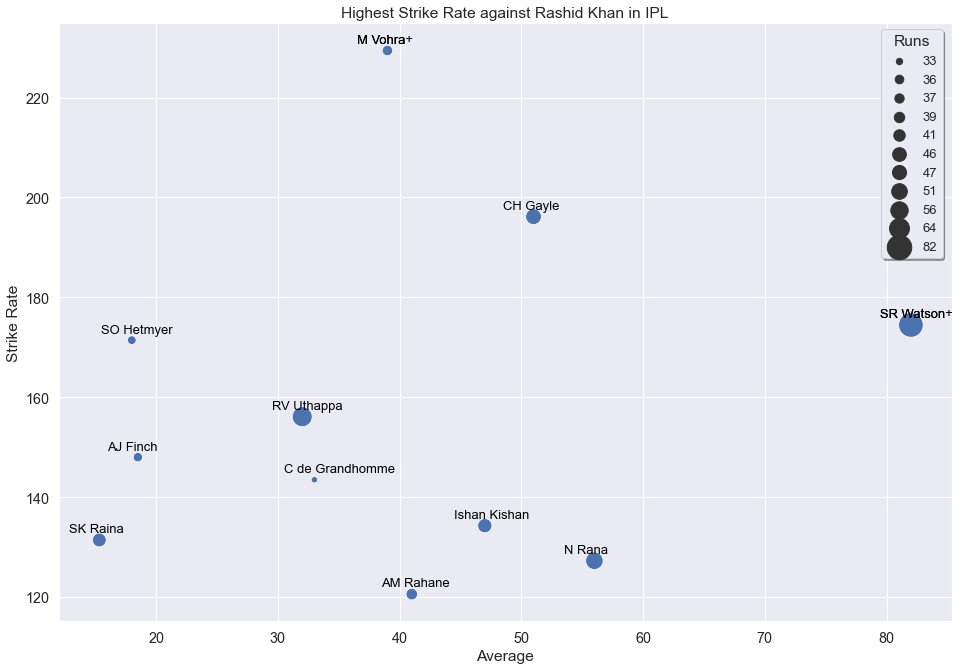

In [129]:
plt.figure(figsize=(16,11))
sns.set(font_scale=1.3)
# sns.set_style('darkgrid')
sns.scatterplot(y='Strike Rate', x='Average', data=highest_sr_against_rashid_min_fifteen_balls.head(11), size='batsman_runs', sizes=(40, 600), legend='full')
plt.title("Highest Strike Rate against Rashid Khan in IPL")
plt.ylabel("Strike Rate")
plt.xlabel("Average")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,highest_sr_against_rashid_min_fifteen_balls.head(11).shape[0]):
     if(line == 0 or line == 2):
        plt.text(highest_sr_against_rashid_min_fifteen_balls['Average'][line]-2.5 , highest_sr_against_rashid_min_fifteen_balls['Strike Rate'][line]+1.5, highest_sr_against_rashid_min_fifteen_balls.index[line]+"+", horizontalalignment='left', size='small', color='black', )
     plt.text(highest_sr_against_rashid_min_fifteen_balls['Average'][line]-2.5, highest_sr_against_rashid_min_fifteen_balls['Strike Rate'][line]+1.5, highest_sr_against_rashid_min_fifteen_balls.index[line], horizontalalignment='left', size='small', color='black', )

# plt.text(MS_RP_bowler_type['Average'][6]-6.5, MS_RP_bowler_type['Strike Rate'][6]+5.5, MS_RP_bowler_type['Bowler Category'][6], horizontalalignment='left', size='small', color='black', )
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=1, borderaxespad=0., title='Runs', shadow=True, fontsize=13)
